# Reinforcement Learning
Author: Jin Yeom (jinyeom@utexas.edu)

In [12]:
import gym
import numpy as np
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
%matplotlib notebook

## Q-learning

Let's begin with the **Q-learning** algorithm, which is based on the following learning rule,

$$
Q'(s_t, a_t) \leftarrow (1 - \alpha)Q(s_t, a_t) + \alpha(r_t + \gamma \max_{a}Q(s_{t + 1}, a))
$$

which is often written rearranged for convenience, as follows

$$
Q'(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha(r_t + \gamma \max_{a}Q(s_{t + 1}, a) - Q(s_t, a_t))
$$

where the term $r_t + \gamma \max_{a}Q(s_{t + 1}, a) - Q(s_t, a_t)$ directly describes the "error" in Q values.

In [3]:
def update(q_table, obs, action, reward, next_obs, alpha, gamma):
    diff = reward + gamma * np.max(q_table[next_obs, :]) - q_table[obs, action]
    q_table[obs, action] = q_table[obs, action] + alpha * diff

In [4]:
def q_learning(q_table, env, alpha, gamma, epsilon, n_iters, n_eps):
    reward_log = []
    for ep in tqdm(range(n_eps)):
        obs = env.reset()
        i = total_reward = done = 0
        while not done and i < n_iters:
            # ε-greedy is applied for exploration, in which by some probability ε,
            # a random action is chosen, instead of the reward maximizing action.
            action = np.random.choice([env.action_space.sample(), np.argmax(q_table[obs, :])],
                                      p=[epsilon, 1 - epsilon])
            next_obs, reward, done, _ = env.step(action)
            update(q_table, obs, action, reward, next_obs, alpha, gamma)
            total_reward += reward
            obs = next_obs
            i += 1
        reward_log.append(total_reward)
    return reward_log

For this section, we're going to use a simple Grid World based environment called **Frozen Lake**.

In [5]:
env = gym.make("FrozenLake-v0")
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


<IPython.core.display.Javascript object>


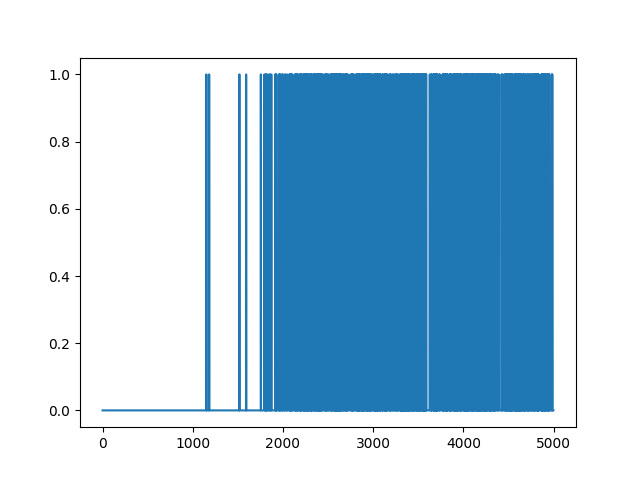

In [6]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))
reward_log = q_learning(q_table, env, 0.1, 0.9, 0.2, 100, 5000)
plt.plot(reward_log)
plt.show()

<IPython.core.display.Javascript object>


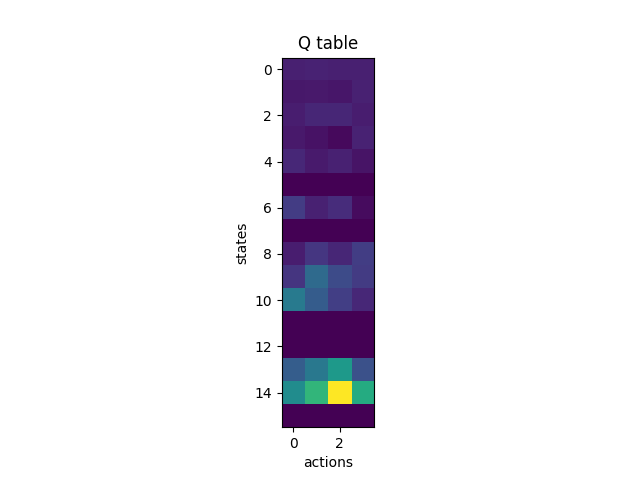

In [7]:
plt.figure()
plt.title("Q table")
plt.xlabel("actions")
plt.ylabel("states")
plt.imshow(q_table)
plt.show()

In [11]:
obs = env.reset()
done = False
while not done:
    env.render()
    action = np.argmax(q_table[obs, :])
    obs, reward, done, info = env.step(action)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


That was fun and all, but Q-learning (or its [deep learning varient from DeepMind](https://deepmind.com/research/dqn/), which is explored in a different notebook) turned out to be not so useful, as it can't be used for continuous control tasks. Policy optimization, which optimizes the agent's policy directly, is currently a popular alternative. There are several methods of policy optimization, including evolutionary algorithms, but in this notebook, we'll focus on gradient-based methods, namely **policy-gradient** methods.

## REINFORCE

## REINFORCE with baseline

## Actor-critic

## Advantage Actor-critic (A2C)

## References
1. https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
2. http://www.cs.utexas.edu/~sniekum/classes/343-S18/lectures/lecture12.pdf